In [2]:
import numpy as np
import simulation_manager, results_annalysis
import instance_genrerantion
import matplotlib.pyplot as plt

## Création de l'instance

#### Génération d'une instance par réduction

In [3]:
from problem_reductions.npp_to_ising import *
# NPP instance
weights = [1, 2, 3, 4]

# Ising instance
J, H = npp_to_ising(weights=weights)

#### Ou génération d'un instance aléatoire

In [4]:
J = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    ])
H = -np.ones(6)

## Nouveau: Choix des fonctions `temperature`, `a` et `pas` personalisées

Pour expérimenter plus vite

In [5]:
num_iterations = 500

def pumpuing_rate(self, t):
    return t/num_iterations

def step_func(self, t):
    return 0.01

## Simulation avec des paramètres choisis

In [11]:
lbd = 0.000001

In [12]:
manager = simulation_manager.SimulationManager(step_size=0.5, num_iterations=num_iterations, num_simulations=400, J=lbd*J, H=H, pumping_rate=pumpuing_rate, stopping_criterion=0, save_states_history=True, save_energies_history=True, n_threads=2, savetofile=False)

In [13]:
states, energies, last_states, last_energies = manager.run_simulation()

In [14]:
speeds = states[:, :, :, 1]
positions = states[:, :, :, 0]
n_cond_init, n_particle,  n_iterration = speeds.shape 
abcisses = np.arange(n_iterration)

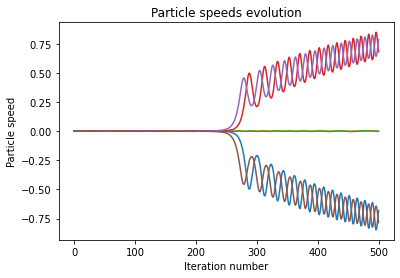

In [15]:
for i in range(n_particle):
   plt.plot(abcisses, positions[1, i, :])
   plt.xlabel("Iteration number")
   plt.ylabel("Particle speed")
   plt.title("Particle speeds evolution")

In [16]:
solutions = ((np.sign(last_states[:, :, 0]) + 1)/2)

In [18]:
solutions[0]

array([0., 1., 1., 1., 1., 0.])

In [19]:
results = []
unsatisfied_constraints = 0
obj_values = []
for i in range(400):
    P = solutions[i].T @ J @ solutions[i]
    obj = np.sum(solutions[i])
    results.append((P, obj, solutions[i]))
    obj_values.append(obj)
    if P != 0:
        unsatisfied_constraints += 1

unsatisfied_constraints/80*100

0.0

In [20]:
max(obj_values)

4.0

Text(0.5, 1.0, 'independent set sizes distribution')

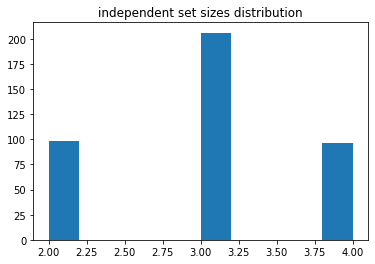

In [21]:
plt.hist(obj_values, bins='auto');
plt.title('independent set sizes distribution')

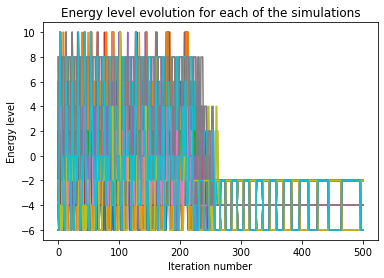

-6.0

In [12]:
results_annalysis.plot_energies_evolution(energies)
results_annalysis.extract_full_solution(states, energies)[0]

In [22]:
pos = states[:, :, 599, 0]

In [23]:
pos

array([[ 1.03560505,  1.        , -0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574],
       [-1.03560505,  1.        ,  0.58523451, ..., -1.00494365,
        -1.01939202, -1.03931574],
       [-1.03560505, -1.        , -0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574],
       ...,
       [ 1.03560505, -1.        ,  0.58523451, ..., -1.00494365,
         1.01939202,  1.03931574],
       [ 1.03560505, -1.        , -0.58523451, ...,  1.00494365,
         1.01939202,  1.03931574],
       [-1.03560505, -1.        ,  0.58523451, ...,  1.00494365,
        -1.01939202,  1.03931574]])

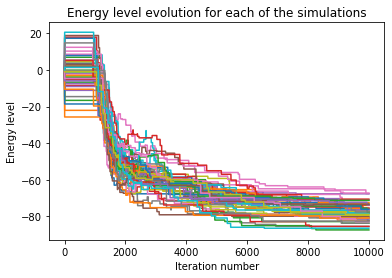

In [28]:
J2 = J * 0.1
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=step_func, n_itterations=10000, n_cond_init=50, J=J2, H=H, savetofile=False)
results_annalysis.plot_energies_evolution(energies)

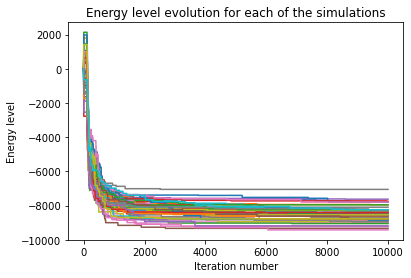

In [37]:
J2 = J * 10
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=step_func, n_itterations=10000, n_cond_init=50, J=J2, H=H, savetofile=False)
results_annalysis.plot_energies_evolution(energies[:, :])

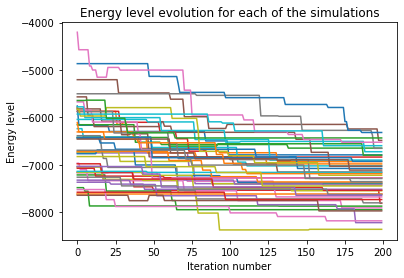

In [42]:
results_annalysis.plot_energies_evolution(energies[:, :])

On a directement accès aux résultats et aussi aux chemin d'accès du fichier contenant l'instance, les paramètres ou les résultats si on veut y avoir accès plus tard

## Interprétation des résultats

#### On peut aller les chercher a partir du filename (si besoin)

(Mais ici on les as direct récupéré en sortie de `compute_single_instance`)

In [10]:
# states, energies = results_annalysis.open_results(path)

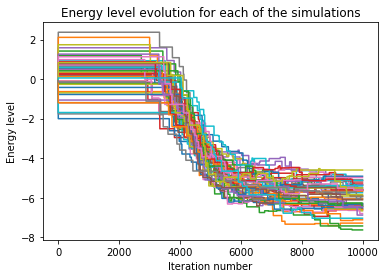

In [25]:
results_annalysis.plot_energies_evolution(energies[:, :])

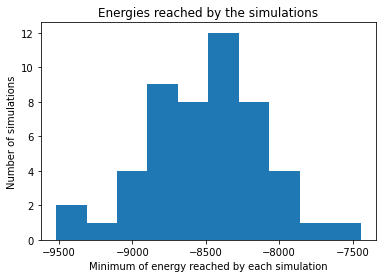

In [30]:
results_annalysis.plot_energies_hist(energies)

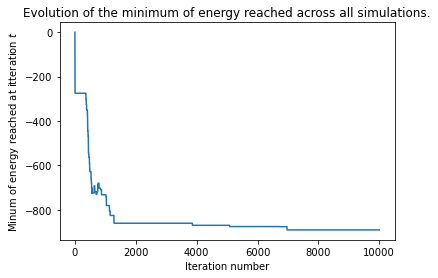

In [13]:
results_annalysis.plot_min_energy_evolution(energies)